<a href="https://colab.research.google.com/github/GermanStanzione/TT-2C2025-Data-Analitycs-Notebooks/blob/main/_24_Clase_13/Mia/Clase_13_NB1_teoria_visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización II - Gráficos de barras

## Introducción

La clase pasada vimos en detalles como graficar series de tiempo, de manera de ver como evoluciona una variable en una dimensión temporal. Por ejemplo, las ventas totales de un producto o una categoría en cada uno de los meses del año.
<BR>
Otro caso muy común es evaluar de manera comparativa las ventas totales de  diferentes productos o categorías en un mismo período de tiempo, para ello podemos usar gráficos de barras.
<BR>
También podríamos queres comparar en cada uno de los meses del año, las ventas y las ganancias, para ello podemos hacer un gráfico de barras apilado.

# Ejemplo introductorio I

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Datos de ventas por producto
productos = ['Producto A', 'Producto B', 'Producto C', 'Producto D']  # Lista de los nombres de los productos
ventas = [300, 250, 400, 350] # Lista de las ventas totales de cada producto en la campaña.

In [3]:
# Armamos el dataframe
df = pd.DataFrame({'Productos': productos, 'Ventas': ventas})

# Mostramos el df resultante
df

,Productos,Ventas
0,Producto A,300
1,Producto B,250
2,Producto C,400
3,Producto D,350


## Visualizamos el df con un gráfico de barras simple usando Seaborn

In [4]:
# Ordenamos las ventas antes de graficarlas
df = df.sort_values(by='Ventas', ascending=False)

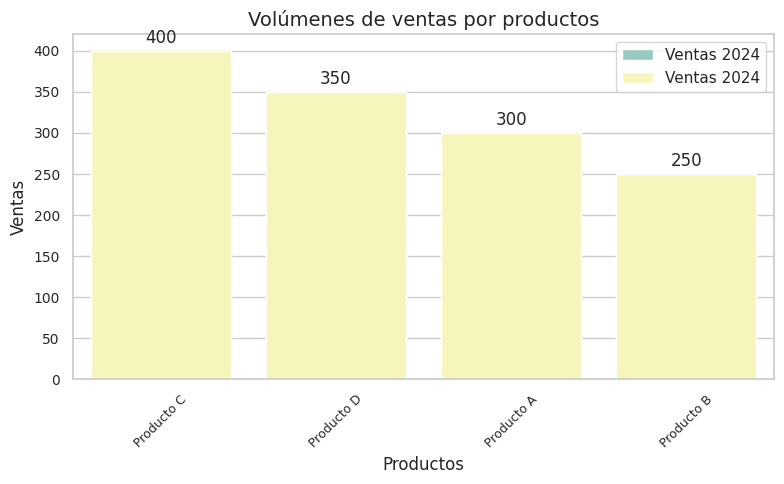

In [15]:
# Estilo y paleta
sns.set_theme(style="whitegrid", palette="Set3", context="notebook")

# Ajustamos tamaño del lienzo
plt.figure(figsize=(8,5))

# Crear el barplot
sns.barplot(data=df, x='Productos', y='Ventas', label='Ventas 2024')

# Obtener eje actual
ax = sns.barplot(data=df, x='Productos', y='Ventas', label='Ventas 2024')

# Agregar etiquetas arriba de las barras
for i, valor in enumerate(df['Ventas']):
    ax.text(i, valor + 10, str(valor), ha='center')

# Ticks (valores de eje)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelrotation=45, labelsize=9)

# Ajustes de título y ejes
plt.title('Volúmenes de ventas por productos', fontsize=14)
plt.xlabel('Productos')
plt.ylabel('Ventas')
plt.legend()
plt.tight_layout() #ajuste auto
plt.show()


## Visualizamos el df con un gráfico de barras simple usando Matplotlib

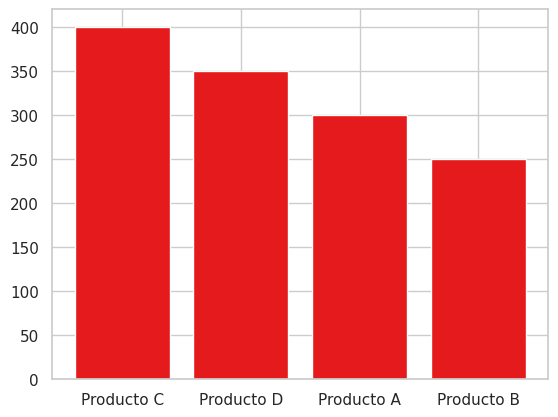

In [17]:
# Estilo y paleta
sns.set_theme(style="whitegrid", palette="Set1", context="notebook")

# Ajustamos tamaño del lienzo


# Crear el plot

plt.bar(df["Productos"],df["Ventas"])
# Obtener eje actual


# Agregar etiquetas arriba de las barras


# Ticks (valores de eje)


# Ajustes de título y ejes
plt.show()

# Ejemplo introductorio II

In [18]:
# Datos de ventas por producto
productos = ['Producto A', 'Producto B', 'Producto C', 'Producto D']  # Lista de los nombres de los productos
ventas = [300, 250, 400, 350] # Lista de las ventas totales de cada producto en la campaña.
ganancias = [50, 70, 20, 10] # Lista de las ganancias totales de cada producto en la campaña.

In [19]:
# Creamos el dataframe
df = pd.DataFrame({
    'Producto': productos,
    'Ventas': ventas,
    'Ganancias': ganancias
})

# Visualizamos el df
df

,Producto,Ventas,Ganancias
0,Producto A,300,50
1,Producto B,250,70
2,Producto C,400,20
3,Producto D,350,10


## Visualizamos el df con un grafico de barras apilado

Seaborn no viene integrado con

In [20]:
# Aseguramos el orden de los meses (opcional)
df.sort_values(by=["Ventas", "Ganancias"], ascending=False, inplace=True)
df

,Producto,Ventas,Ganancias
2,Producto C,400,20
3,Producto D,350,10
0,Producto A,300,50
1,Producto B,250,70


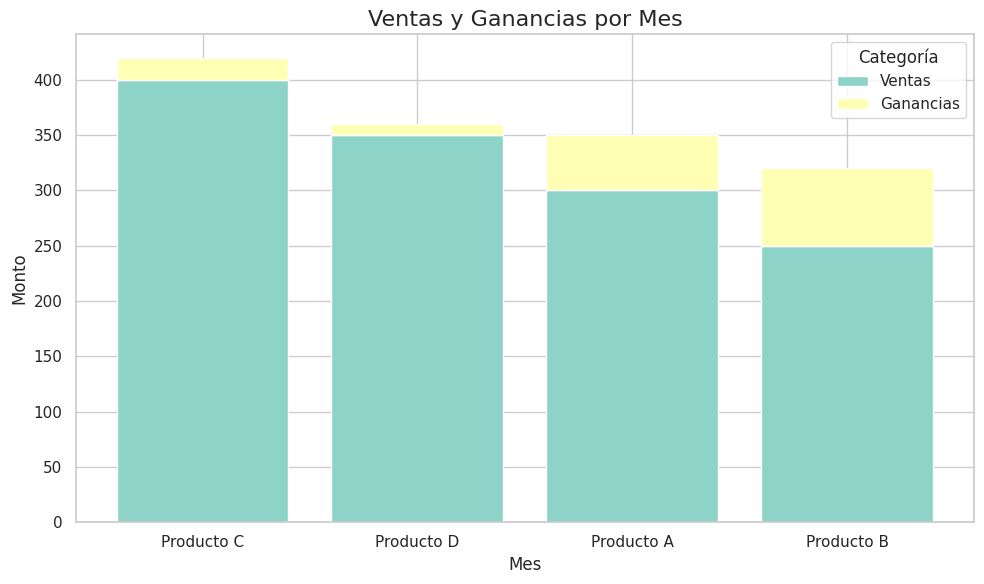

In [21]:
# Generamos un gráfico de barras apilado, de manera de mostrar comparativamente
# las ganancias sobre las ventas

# Estilos
sns.set_theme(style="whitegrid", palette="Set3", context="notebook")

plt.figure(figsize=(10,6))

# Primer nivel (abajo)
plt.bar(df["Producto"], df["Ventas"], label="Ventas")

# Segundo nivel (arriba)
plt.bar(df["Producto"], df["Ganancias"],
        bottom=df["Ventas"],
        label="Ganancias")

# Títulos y ejes
plt.title("Ventas y Ganancias por Mes", fontsize=16)
plt.xlabel("Mes")
plt.ylabel("Monto")
plt.legend(title="Categoría")
plt.tight_layout()
plt.show()

# Ejemplo introductorio III

In [22]:
# Dataset nuevo: ventas trimestrales de tres productos
productos = ["Producto A", "Producto B", "Producto C"]
ventas_Q1 = [250, 300, 200]
ventas_Q2 = [280, 330, 240]
ventas_Q3 = [320, 310, 260]

# Creamos un DataFrame con los datos
df = pd.DataFrame({
    "Producto": productos,
    "Q1": ventas_Q1,
    "Q2": ventas_Q2,
    "Q3": ventas_Q3
})

df

,Producto,Q1,Q2,Q3
0,Producto A,250,280,320
1,Producto B,300,330,310
2,Producto C,200,240,260


In [23]:
# Transformar a formato largo
df_long = df.melt(id_vars="Producto",
                        var_name="Trimestre",
                        value_name="Ventas")
df_long

,Producto,Trimestre,Ventas
0,Producto A,Q1,250
1,Producto B,Q1,300
2,Producto C,Q1,200
3,Producto A,Q2,280
4,Producto B,Q2,330
5,Producto C,Q2,240
6,Producto A,Q3,320
7,Producto B,Q3,310
8,Producto C,Q3,260


## Visualizamos con un grafico de barrar por grupos

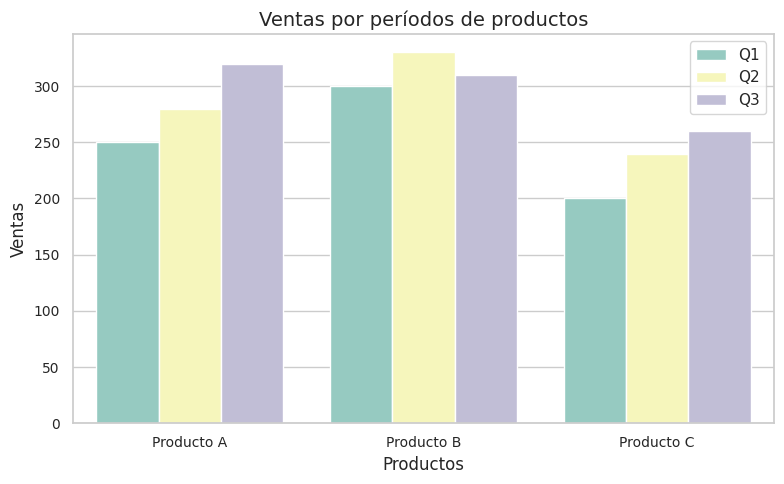

In [24]:
# Estilo y paleta
sns.set_theme(               # set_theme combina estilo + contexto + paleta
    style="whitegrid",       # opciones: 'white', 'whitegrid', 'dark', 'darkgrid', 'ticks'
    context="notebook",          # escala general: 'paper', 'notebook', 'talk', 'poster'
    palette="Set3"           # paleta de colores base: "deep", "muted", "pastel" / Set1, Set2, Set3
)

# Ajustamos el lienzo
plt.figure(figsize=(8,5))

# Graficamos
sns.barplot(data=df_long, x="Producto", y="Ventas", hue="Trimestre", width=0.8)


# Ticks (valores de eje)
plt.tick_params(axis='both', labelsize=10)

# Ajustes de título y ejes
plt.title('Ventas por períodos de productos', fontsize=14)
plt.xlabel('Productos')
plt.ylabel('Ventas')
plt.legend()
plt.tight_layout()
